# Деревья решений

Деревья решений — это одни из первых моделей машинного обучения, которые были известны человеку. Изначально их строили без специальных алгоритмов, а просто вручную.

Когда требовалось принять решение по проблеме, для которой построено дерево, человек брал и проходился по этому дереву.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/manual_construction_of_decision_trees.png" width="900"></center>

<center><em>Предсказание типа линз для человека</em></center>



За принципом работы дерева решений стоит понятная интуиция. В каждом узле есть какой-то вопрос. Нормальное ли у человека слезоотделение, есть ли у него астигматизм и так далее. И, отвечая на каждый из этих вопросов, мы перемещаемся по дереву до тех пор, пока не придем к нужному типу линз.

Такое дерево решений можно построить без использования моделей машинного обучения, просто на основании опыта многих врачей ([экспертные системы 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D1%82%D0%BD%D0%B0%D1%8F_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0)).


Во многих задачах, где нет локальной связанности данных, характерной для изображений и текстов, алгоритмы, основанные на деревьях решений, часто эффективнее, чем нейронные сети.

## Принцип работы дерева решений

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/decision_tree_principle.png" width="900"></center>

Проиллюстрируем принцип работы дерева решений. Допустим, есть 2 вещественных признака. Для каждой точки мы создаем вопрос: признак $x_1$ больше $0.7$ или меньше? Если больше $0.7$, то это красная точка. Если меньше $0.7$, то идем во второй внутренний узел T2 и спрашиваем: признак $x_2$ меньше $0.5$ или больше? Если меньше $0.5$, то точка будет красная, в другом случае — синяя.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/decision_trees_partitioning_space.png" width="700"></center>

<center><em>Разбиение пространства</em></center>

Дерево решений делит пространство признаков с помощью плоскостей на области, и в каждой из этих областей предсказывается константная величина.

## Классификация

Деревья решений, как правило, используются при решении 2-х типов задач — классификации и регрессии.
Примером классификации является предсказание типа линз. Предсказание может быть:


*   Жёстким (метка класса)
*   Мягким (вероятность класса)

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/probability_predicions_by_decision_tree.png" width="900"></center>

<center><em>Предсказание типа линз для человека</em></center>

Особенно актуальны модели, которые могут предсказывать вероятности классов. Жесткие предсказания — не самый удачный вариант, лучше оставить человеку возможность оценить результат и самому принять решение. К примеру, лекарства действуют с некоторой вероятностью, потому что невозможно учесть все факторы.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/probability_estimation_by_decision_tree.png" width="700"></center>

В листе находятся объекты разных классов. Для того, чтобы оценить вероятность принадлежности объекта к какому-то определенному классу, можно просто число представителей данного класса поделить на общее число объектов. Это дает нам одну важную интуицию: желательно, чтобы в листе  было не очень мало объектов. Чем больше объектов, тем меньше ошибка.

Фактически, это оценка генеральной совокупности по ограниченной выборке. Можно использовать [распределение Бернулли 📚[wiki]](https://ru.wikipedia.org/wiki/Распределение_Бернулли) для двух классов или [мультиномиальное распределение 📚[wiki]](https://ru.wikipedia.org/wiki/Мультиномиальное_распределение) для большего количества классов.

### Для бинарных признаков

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/decision_tree_for_two_features.png" width="900"></center>

Представим, что мы решаем задачу бинарной классификации (есть инфаркт у человека или нет).

Возьмем в качестве первого вопроса признак "боль в груди". В 1-ом и во 2-ом листах получается разное распределение людей. В левом листе инфаркт более вероятен, в правом — менее вероятен.

Другим признаком может быть “как хорошо циркулирует кровь”, в таком случае тоже получится неплохое разделение. Последний признак — “есть ли атеросклероз”.

Мы получили три разбиения по разным признакам. Теперь мы бы хотели выбрать лучший признак, для этого нам нужно их сравнить.

Логично выбрать такое разбиение, которое дает нам "хорошие" узлы — те, в которых преимущественно сосредоточены объекты одного класса.

Одна из используемых метрик называется [Gini ✏️[blog]](https://www.learndatasci.com/glossary/gini-impurity/) . Она считается по следующей формуле:

$$\large \text{Gini} = 1 - \sum_ip_i^2$$

Gini — мера [неопределенности ✏️[blog]](https://quantdare.com/decision-trees-gini-vs-entropy/) значения класса внутри узла. Соответственно, чем она ниже, тем лучше получившийся узел.

Посчитаем Gini для признака "Боль в груди":

$\text{Gini}_1 = 1- (\dfrac{105}{105+33})^2 - (\dfrac{33}{105+33})^2 = 0.364$

$\text{Gini}_2 = 1- (\dfrac{34}{34+125})^2 - (\dfrac{125}{34+125})^2 = 0.336$

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/compute_gini_for_binary_features.png" width="900"></center>

Такую метрику можно посчитать для каждого узла. Дальше посчитать метрику для следующего узла. Дальше можем оценить, насколько стал лучше результат в зависимости от используемого признака.

$$\large \text{Impurity decrease} = \text{Gini}_0 - (\frac{n_1}{n_1+n_2}\text{Gini}_1 + \frac{n_2}{n_1+n_2}\text{Gini}_2),$$

где $n_1, n_2$ — число объектов в листьях,

$ \quad\  \text{Gini}_0$ — чистота исходного узла.

**Боль в груди:**

 $\text{Impurity decrease} = 0.498 - (\dfrac{138}{138+159})\cdot 0.364 - (\dfrac{159}{138+159})\cdot 0.336 = 0.149$

**Хорошо циркулирует кровь:**

 $\text{Impurity decrease} = 0.498 - (\dfrac{164}{164+133})\cdot 0.349 - (\dfrac{133}{164+133})\cdot 0.373 = 0.138$

**Есть атеросклероз:**  

$\text{Impurity decrease} = 0.498 - (\dfrac{123}{123+174})\cdot 0.377 - (\dfrac{174}{123+174})\cdot 0.383 = 0.117$

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/compute_impurity_decrease.png" width="600"></center>

**Выбираем это разбиение как приводящее к наибольшему уменьшению Impurity**

Наибольший $\text{Impurity decrease}$ в признаке “боль в груди”. Значит, мы возьмем “боль в груди” как признак, на основании которого продолжим строить дерево.  

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/compute_gini_for_another_features.png" width="600"></center>

Каждый раз мы будем выбирать новые признаки. В одном листе один признак лучше разделяет его на 2, в другом — другой. Тут мы остановились при достижении глубины дерева 2.


### Для вещественных признаков

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/decision_tree_for_real_numbers.png" width="1000"></center>

Вещественный признак сортируется, после чего мы выбираем оптимальный порог для разбиения. Для этого считаем `impurity_decrease` для каждого порога и выбираем лучший.

## Регрессия


Для решения задач регрессии дерево строится практически так же, но есть несколько нюансов.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/decision_tree_regression.png" width="700"></center>

Как лучше всего одним числом охарактеризовать все эти объекты, попавшие в один лист?

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/regression_metrics.png" width="900"></center>

<center><em>Способы формирования предсказания в листе для регрессии</em></center>

Как мы помним из статистики, у нас нет однозначного ответа на этот вопрос. Мы можем для распределения всех этих объектов в листе предсказывать наиболее частое значение, медиану, среднее значение.

Обычно предсказывают среднее значение, потому что с ним легче всего работать и его чаще всего используют в статистике.

## Свойства деревьев решений

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/why_decision_tree_powerful_method.png" width="900"></center>

$\displaystyle \qquad \qquad \qquad \qquad h(x) = \sum \sigma(\dots \sum(w^Tx)) \qquad \qquad \qquad \qquad \qquad \qquad \qquad h(x) = \sum_dc_dI\{x \in R_d\}$

У деревьев решений есть еще одно хорошее свойство. Существует замечательная [теорема об универсальном аппроксиматоре 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%A6%D1%8B%D0%B1%D0%B5%D0%BD%D0%BA%D0%BE). Ее суть в том, что нейросеть с одним скрытым слоем сможет аппроксимировать любую заданную гладкую функцию.

Для деревьев решений есть аналогичная теорема, говорящая о том, что дерево может аппроксимировать любую заданную кусочно-постоянную функцию.

Дерево решений, в отличие от нейронной сети, может адаптироваться к выборке любого размера, любому количеству признаков. Для нейронной сети эта теорема предполагает, что можно бесконечно увеличивать скрытые слои.

В случае же с деревьями решений лист разбивается еще на 2 части. Это можно делать бесконечно до тех пор, пока в каждом листе не окажется по одному объекту. Это приведет к сильному переобучению, но, если бы у нас была вся генеральная совокупность, мы бы выучили ее гораздо легче деревом решений, чем нейронной сетью.

### Неустойчивость деревьев решений<a class="anchor" style="autocontent" id="Неустойчивость-деревьев-решений"/><br>

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/instability_of_decision_trees.png" width="900"/></center>

Деревья решений не используются в чистом виде, потому что они неустойчивы. Если у нас есть данные, и мы удалим из них несколько объектов, то дерево решений может сильно поменяться.

Продемонстрируем неустойчивость решения, получаемого при помощи деревьев решений, на примере датасета Iris ([ирисы Фишера 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)).

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров трёх видов: Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor).

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width).

Будем учиться отделять Ирис разноцветный (Iris versicolor) от остальных видов.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target != 1  # 0 for setosa, 1 - versicolor, 2 - virginica

Сделаем два разных разбиения на обучение и тест. И посмотрим, будут ли отличаться деревья, построенные для данных разбиений.

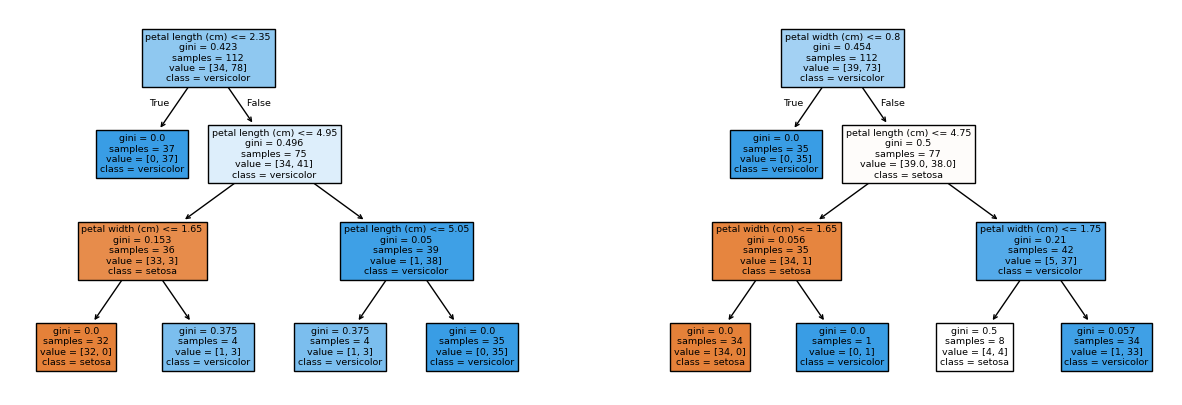

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# first set of points
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    df[dataset.feature_names], df["target"], random_state=0
)
clf1 = DecisionTreeClassifier(max_depth=3)
clf1.fit(x_train1, y_train1)

# second set of points
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    df[dataset.feature_names], df["target"], random_state=42
)
clf2 = DecisionTreeClassifier(max_depth=3)
clf2.fit(x_train2, y_train2)

fn = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
cn = ["setosa", "versicolor", "virginica"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=100)
tree.plot_tree(clf1, feature_names=fn, class_names=cn, filled=True, ax=axes[0])
tree.plot_tree(clf2, feature_names=fn, class_names=cn, filled=True, ax=axes[1])
plt.show()

Видим, что даже деревья максимальной глубины 3 уже не совпадают между собой. Справедливо отметить, что у нас маленький датасет — как правило, чем датасет больше, тем устойчивее будет получаться дерево на первых уровнях.

Если использовать деревья бОльшей глубины, то и структура деревьев (то, как они выглядят, даже если не обращать внимания на конкретные признаки в узлах) будет отличаться.

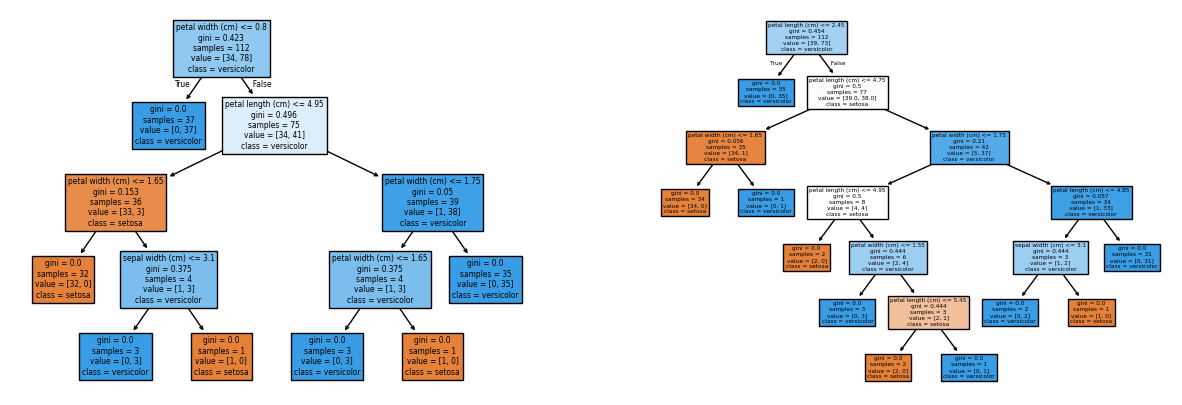

In [ ]:
# first set of points
clf1 = DecisionTreeClassifier(max_depth=10, random_state=0)
clf1.fit(x_train1, y_train1)

# second set of points
clf2 = DecisionTreeClassifier(max_depth=10, random_state=42)
clf2.fit(x_train2, y_train2)


fn = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
cn = ["setosa", "versicolor", "virginica"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=100)
tree.plot_tree(clf1, feature_names=fn, class_names=cn, filled=True, ax=axes[0])
tree.plot_tree(clf2, feature_names=fn, class_names=cn, filled=True, ax=axes[1])
plt.show()

### Переобучение деревьев

Если алгоритм при небольшом изменении признаков существенно меняет свое решение, то это указывает на возможное переобучение. Если алгоритм существенно реагирует на любой шум в данных— доверять его решениям опасно.

Посмотрим это на синтетическом датасете:

In [ ]:
# handson-ml
import numpy as np
from matplotlib.colors import ListedColormap


def plot_decision_boundary(
    clf, x, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.85, contour=True, bolded=False
):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#FEE7D0", "#bea6ff", "#B8E1EC"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(["#FEE7D0", "#5D5DA6", "#B8E1EC"])
        if bolded:
            custom_cmap2 = ListedColormap(["#FEE7D0", "#5D5DA6", "#000000"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2)
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "D", c="#F9B041", alpha=alpha)
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "o", c="#2DA9E1", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

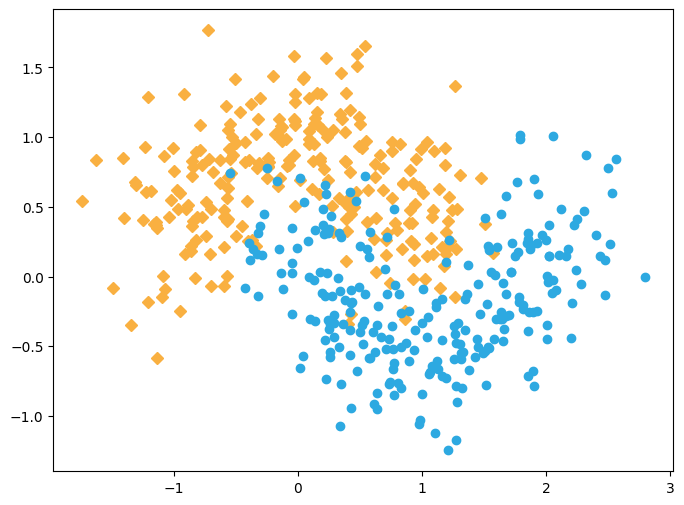

In [ ]:
import sklearn

x, y = sklearn.datasets.make_moons(n_samples=500, noise=0.30, random_state=42)

plt.figure(figsize=(8, 6))
plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "D", c="#F9B041")
plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "o", c="#2DA9E1")
plt.show()

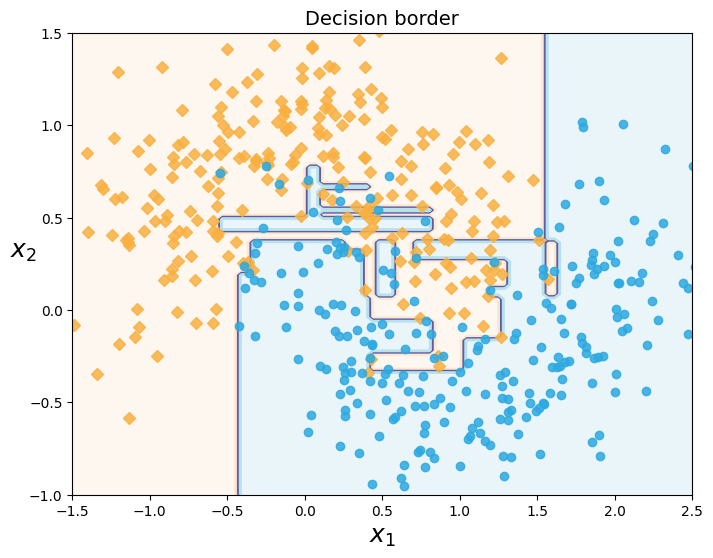

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

plt.figure(figsize=(8, 6))
clf = DecisionTreeClassifier(max_depth=20, random_state=42)
clf.fit(x_train, y_train)
plot_decision_boundary(clf, x, y)
plt.title("Decision border", fontsize=14)
plt.show()

В областях, покрашенных в оранжевый, модель будет классифицировать точки как объекты из класса $0$. В синих — как объекты из класса $1$.

Обратите внимание на странные рваные области на рисунке. В этих областях из-за шума, присутствующего в данных, оказались объекты другого класса. Дерево переобучилось под обучающую выборку.

Что произойдет, если мы возьмем разные разбиения данных на обучение и тест для одного и того же датасета?

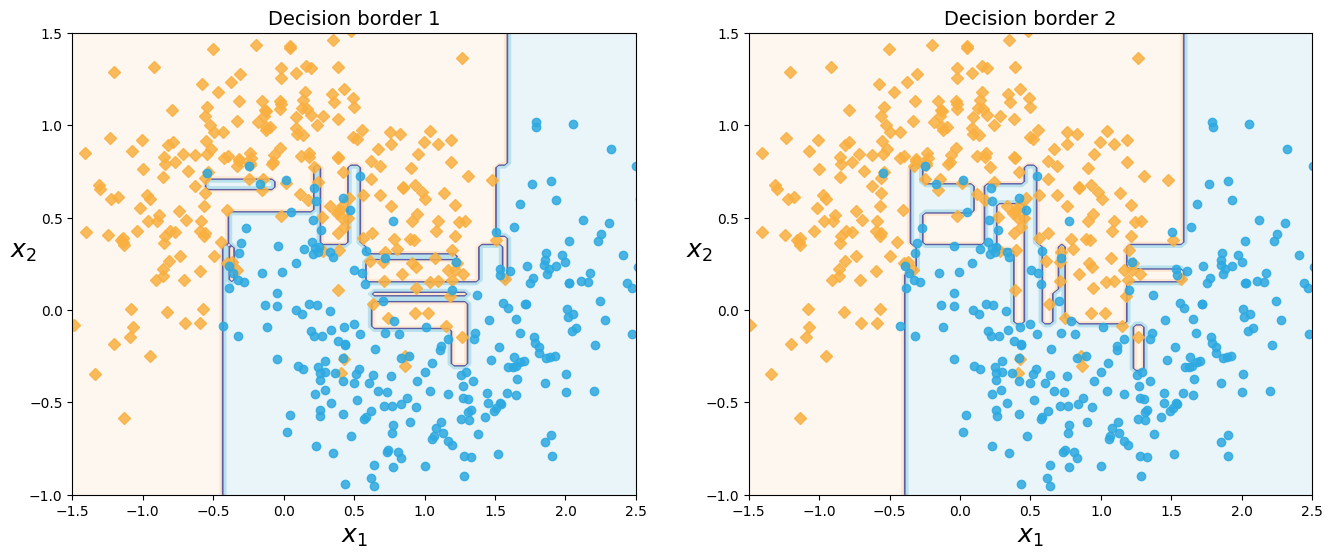

In [ ]:
# first set of points
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, random_state=1)
clf1 = DecisionTreeClassifier(max_depth=20, random_state=42)
clf1.fit(x_train1, y_train1)

# second set of points
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, random_state=2)
clf2 = DecisionTreeClassifier(max_depth=20, random_state=42)
clf2.fit(x_train2, y_train2)

plt.figure(figsize=(16, 6))
plt.subplot(121)
plot_decision_boundary(clf1, x, y)
plt.title("Decision border 1", fontsize=14)
plt.subplot(122)
plot_decision_boundary(clf2, x, y)
plt.title("Decision border 2", fontsize=14)
plt.show()

Границы решений поменялись. Исчезли одни "рваные" границы и появились другие. Наше дерево неустойчиво, из-за малейшего шума в данных оно может поменять свое предсказание. Оно переобучается на шум в данных.

В настройках максимальная глубина дерева поставлена равной 20. Сделаем дерево глубины 1:

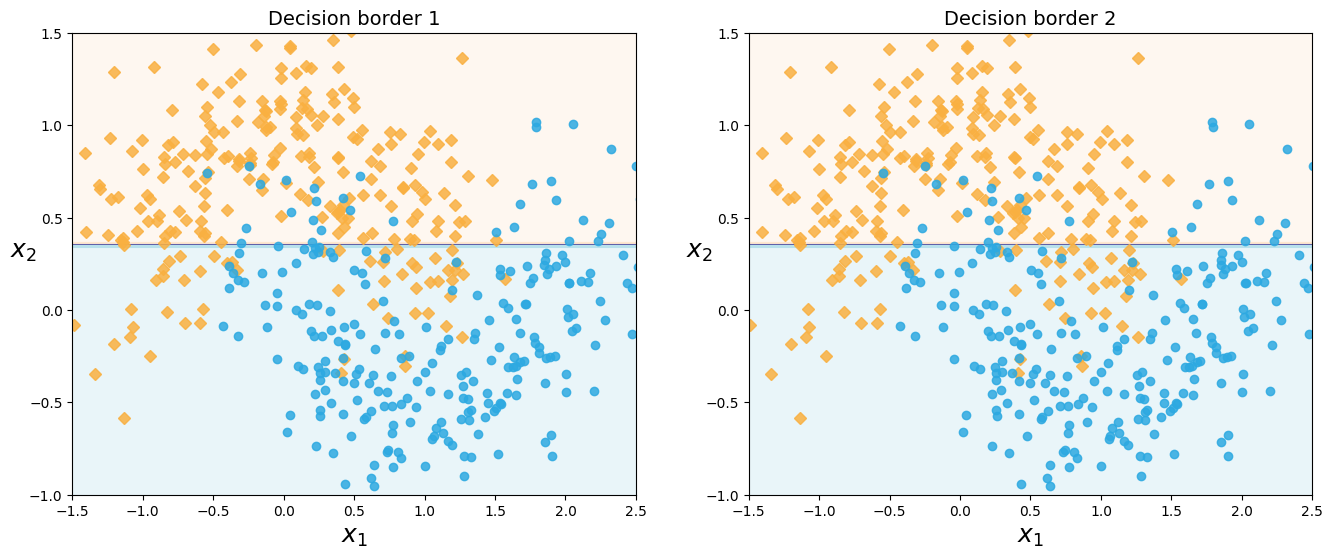

In [ ]:
# first set of points
clf1 = DecisionTreeClassifier(max_depth=1, random_state=42)
clf1.fit(x_train1, y_train1)

# second set of points
clf2 = DecisionTreeClassifier(max_depth=1, random_state=42)
clf2.fit(x_train2, y_train2)

plt.figure(figsize=(16, 6))
plt.subplot(121)
plot_decision_boundary(clf1, x, y)
plt.title("Decision border 1", fontsize=14)
plt.subplot(122)
plot_decision_boundary(clf2, x, y)
plt.title("Decision border 2", fontsize=14)
plt.show()

Или глубины 2:

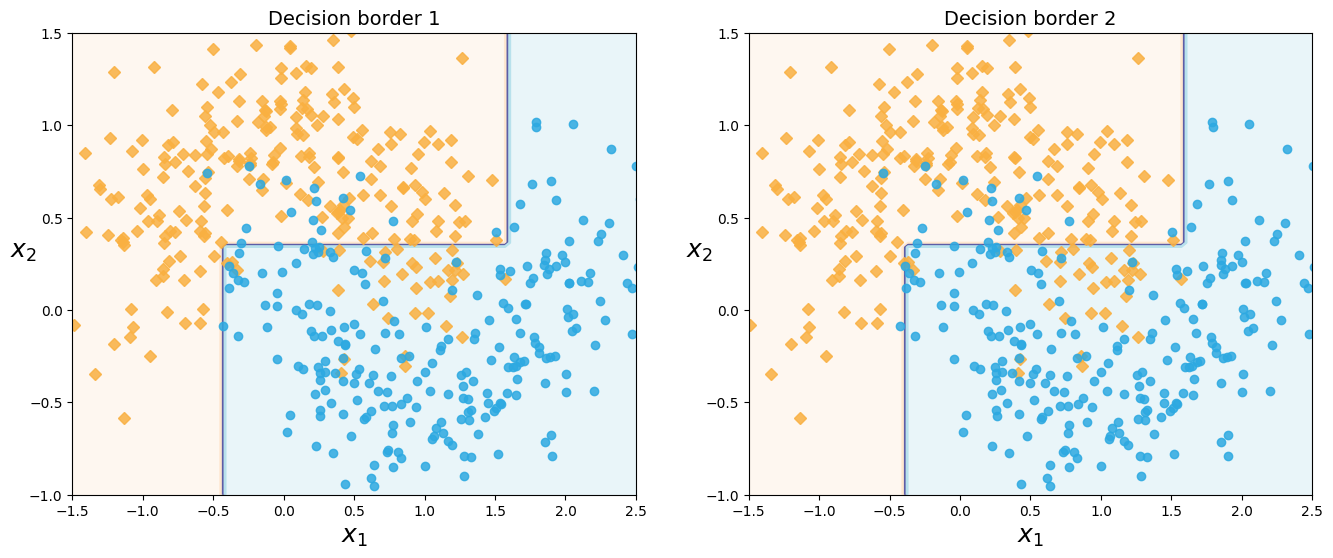

In [ ]:
# first set of points
clf1 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf1.fit(x_train1, y_train1)

# second set of points
clf2 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf2.fit(x_train2, y_train2)

plt.figure(figsize=(16, 6))
plt.subplot(121)
plot_decision_boundary(clf1, x, y)
plt.title("Decision border 1", fontsize=14)
plt.subplot(122)
plot_decision_boundary(clf2, x, y)
plt.title("Decision border 2", fontsize=14)
plt.show()

Теперь полученные границы решений (почти) совпадают. Но наше дерево не в состоянии (в обоих случаях) уловить закономерность в исходных данных. Если мы отложим только тренировочный датасет, то увидим следующее:

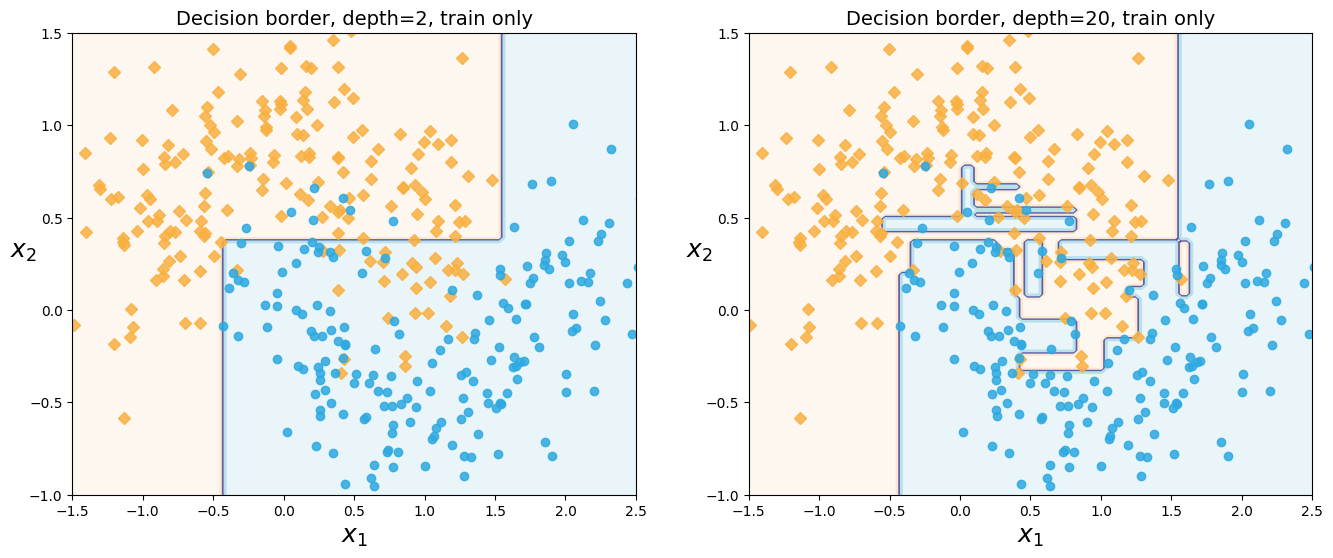

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

clf1 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf1.fit(x_train, y_train)

clf2 = DecisionTreeClassifier(max_depth=20, random_state=42)
clf2.fit(x_train, y_train)

plt.figure(figsize=(16, 6))
plt.subplot(121)
plot_decision_boundary(clf1, x_train, y_train)
plt.title("Decision border, depth=2, train only", fontsize=14)
plt.subplot(122)
plot_decision_boundary(clf2, x_train, y_train)
plt.title("Decision border, depth=20, train only", fontsize=14)
plt.show()

Мы видим, что в то время как дерево большой глубины выучило нашу тренировочную выборку почти идеально, дерево малой глубины для многих объектов из тренировочной выборки предсказывает неверный класс. Причем, оно не может исправиться в силу ограничения на глубину.

В случае дерева с малой глубиной нам не хватает **сложности модели**, чтобы уловить **внутреннюю структуру данных**.